<a href="https://colab.research.google.com/github/Sergius-DS/elecciOn_datasets/blob/main/diabetes_EDA_Limpieza_03_Dic2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA SET DIABETES

# EDA

In [94]:
# =================================================================================
# MANIPULACIÓN Y ANÁLISIS DE DATOS
# =================================================================================
import pandas as pd  # Para manipulación de datos en estructuras tipo DataFrame
import numpy as np  # Para cálculos numéricos y operaciones matriciales

# =================================================================================
# GESTIÓN DE ADVERTENCIAS
# =================================================================================
import warnings  # Para manejar y silenciar advertencias
warnings.filterwarnings('ignore')  # Ignorar advertencias para una salida más limpia

# =================================================================================
# FUNCIONES PERSONALIZADAS
# =================================================================================
# Importación de funciones creadas por el usuario
# Ejemplo: funciones como categorizar_columnas, verifica_consistencia_filas
from funciones import *

# =================================================================================
# CONFIGURACIÓN DE PANDAS
# =================================================================================
# Mostrar todas las columnas en las salidas de DataFrame
pd.set_option('display.max_columns', None)
# Configurar formato para números decimales
pd.set_option('display.float_format', '{:.2f}'.format)

# =================================================================================
# VISUALIZACIÓN DE DATOS
# =================================================================================
import matplotlib.pyplot as plt  # Herramientas de visualización general
import matplotlib.image as mpimg  # Para trabajar con imágenes
import matplotlib.patches as mpatches
import seaborn as sns  # Visualización avanzada basada en Matplotlib

# =================================================================================
# PREPROCESAMIENTO DE DATOS
# =================================================================================
# Codificar variables categóricas en etiquetas numéricas
from sklearn.preprocessing import LabelEncoder

# =================================================================================
# DIVISIÓN DE DATOS Y SELECCIÓN DE CARACTERÍSTICAS
# =================================================================================
# Dividir datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE  # Eliminación recursiva de características
from sklearn.linear_model import LogisticRegression  # Modelo de regresión logística

# =================================================================================
# ANÁLISIS ESTADÍSTICO
# =================================================================================
from scipy import stats  # Funciones estadísticas y pruebas de hipótesis
import statsmodels.api as sm  # Modelos estadísticos avanzados
# Calcular factores de inflación de la varianza (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
ds = pd.read_csv('data_diabetes_limpio.csv')
#ds = pd.read_csv('data_diabetes_limpio.csv', parse_dates=['FECHA_AFILIADOS_SIS', 'FECHA_PRIMER_DX'])

In [96]:
ds.head()

,FECHA_AFILIADOS_SIS,CODIGO_ANONIMIZADO,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,TIPO_DIABETES,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,HOSPITALIZADO,UBICACION,latitud,longitud,AÑO,ANTIGUEDAD_DX_DIAS
0,2023-09-30,000015CA7003D37272A17DE250F6AFE9339F487360EC50...,75,70101,CALLAO,CALLAO,CALLAO,0,2018-01-05,1,1,1,0,1,6.60,0,0.00,0,0,CALLAO-CALLAO-CALLAO,-12.06,-77.15,2018,2524
1,2023-03-31,0000249BA42728EB9AF192293384E60E78449CE1DDA27A...,62,110106,ICA,ICA,PARCONA,0,2018-08-09,1,0,0,0,0,0.00,0,0.00,0,0,ICA-ICA-PARCONA,-14.05,-75.69,2018,2308
2,2023-09-30,000031B49CE1B8437CF896A1D20A1E7A5048DE00952634...,55,40112,AREQUIPA,AREQUIPA,PAUCARPATA,1,2018-02-09,1,0,1,1,5,53.67,0,0.00,0,0,AREQUIPA-AREQUIPA-PAUCARPATA,-16.43,-71.50,2018,2489
3,2023-03-31,000088EB332F5E7B13C522719F24EDC16A12FC1245B405...,56,150125,LIMA,LIMA,PUENTE PIEDRA,1,2023-01-17,1,1,0,0,2,0.00,0,0.00,0,0,LIMA-LIMA-PUENTE PIEDRA,-11.87,-77.08,2023,686
4,2023-03-31,0000AD2FC5F5176DF573CE912D47FB0E1AF58917E81C64...,78,60101,CAJAMARCA,CAJAMARCA,CAJAMARCA,1,2021-11-26,1,0,0,0,0,0.00,0,0.00,0,0,CAJAMARCA-CAJAMARCA-CAJAMARCA,-7.15,-78.51,2021,1103


In [97]:
ds.shape

(623867, 24)

In [98]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623867 entries, 0 to 623866
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   FECHA_AFILIADOS_SIS   623867 non-null  object 
 1   CODIGO_ANONIMIZADO    623867 non-null  object 
 2   EDAD                  623867 non-null  int64  
 3   UBIGEO                623867 non-null  int64  
 4   DEPARTAMENTO          623867 non-null  object 
 5   PROVINCIA             623867 non-null  object 
 6   DISTRITO              623867 non-null  object 
 7   SEXO                  623867 non-null  int64  
 8   FECHA_PRIMER_DX       623867 non-null  object 
 9   TIPO_DIABETES         623867 non-null  int64  
 10  CON_DX_OBESIDAD       623867 non-null  int64  
 11  CON_DX_HIPERTENSION   623867 non-null  int64  
 12  CON_DX_SALUDMENTAL    623867 non-null  int64  
 13  CANT_ATENCIONES       623867 non-null  int64  
 14  VALOR_NETO            623867 non-null  float64
 15  

In [99]:
categorical = ds.select_dtypes(include='object').columns

In [100]:
numerical = ds.select_dtypes(exclude='object').columns

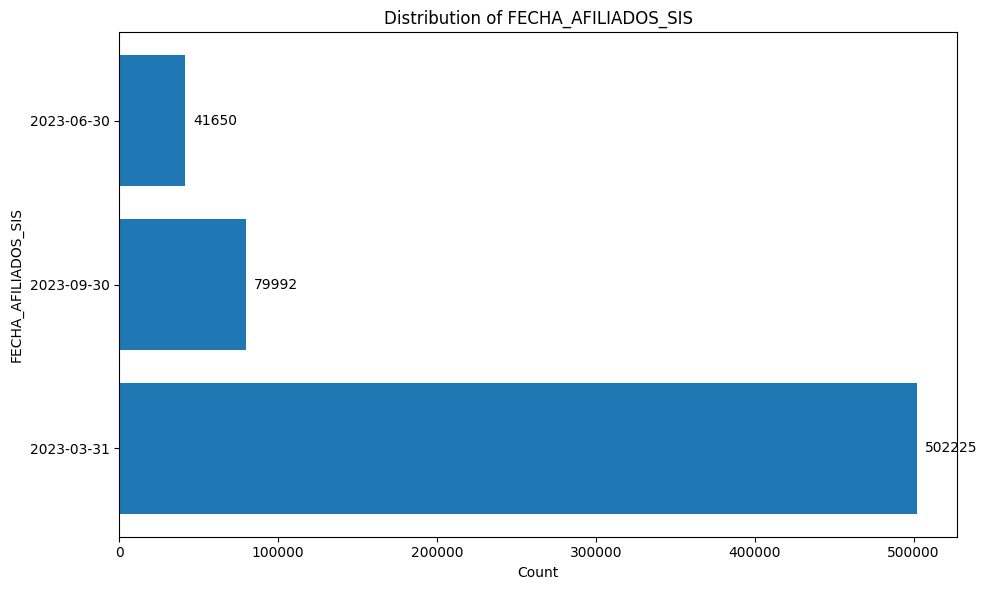


----------------------------------------

Skipping column 'CODIGO_ANONIMIZADO' due to high cardinality (623867 categories).
Skipping column 'DEPARTAMENTO' due to high cardinality (25 categories).
Skipping column 'PROVINCIA' due to high cardinality (196 categories).
Skipping column 'DISTRITO' due to high cardinality (1708 categories).
Skipping column 'FECHA_PRIMER_DX' due to high cardinality (2099 categories).
Skipping column 'UBICACION' due to high cardinality (1861 categories).


In [101]:
plot_categorical_columns_topn(ds, categorical)

In [ ]:
numerical

Index(['EDAD', 'UBIGEO', 'CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION',
       'CON_DX_SALUDMENTAL', 'CANT_ATENCIONES', 'VALOR_NETO',
       'CANT_ATENCIONES_HOSP', 'VALOR_NETO_HOSP', 'DIAS_HOSP', 'HOSPITALIZADO',
       'latitud', 'longitud', 'AÑO', 'ANTIGUEDAD_DX_DIAS'],
      dtype='object')

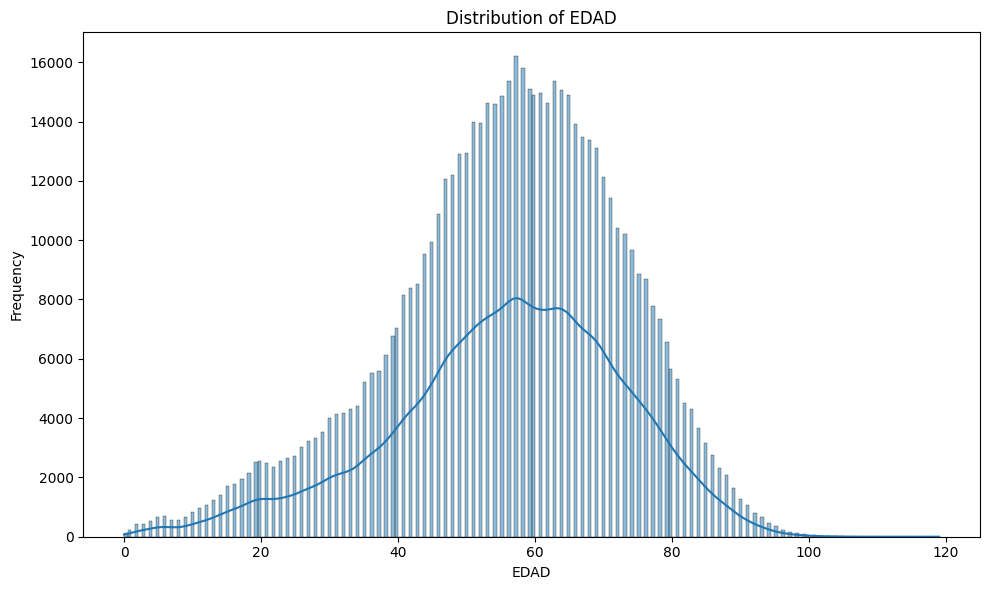

In [102]:
plot_numerical_columns_histograma(ds, ['EDAD'])

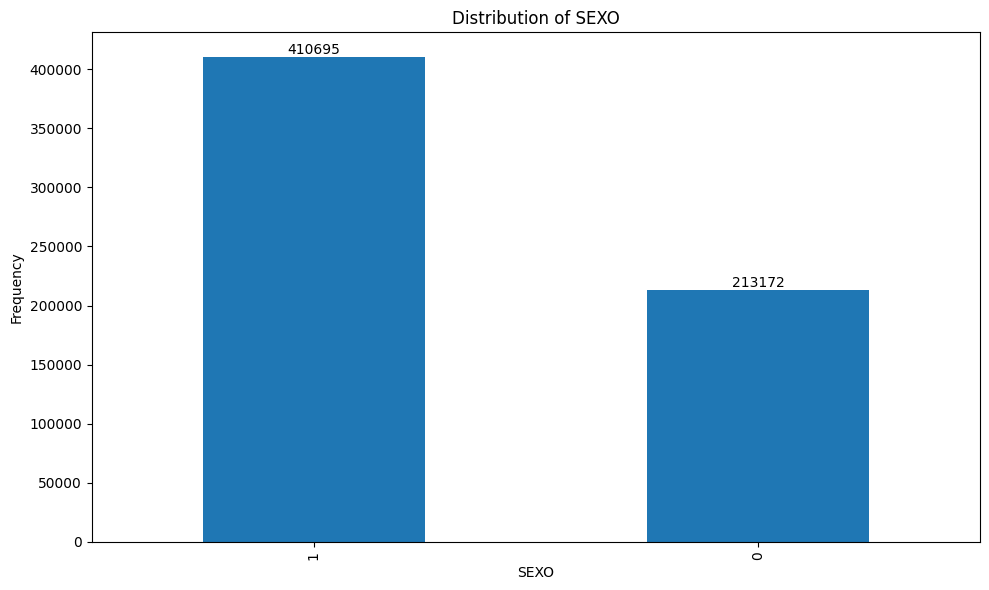

In [103]:
plot_numerical_columns_vcount(ds, ['SEXO'] )

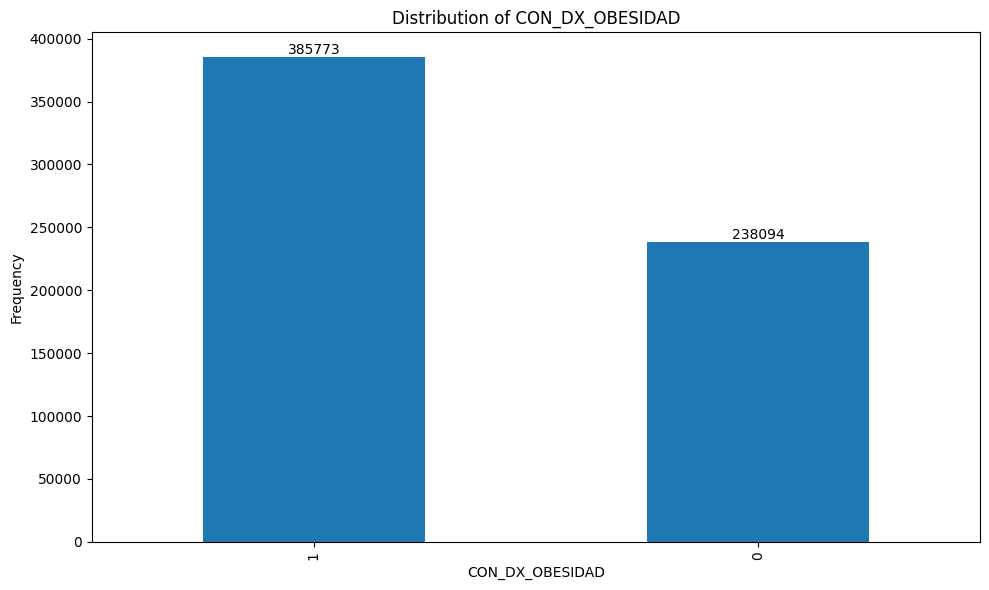

In [ ]:
plot_numerical_columns_vcount(ds, ['CON_DX_OBESIDAD'] )

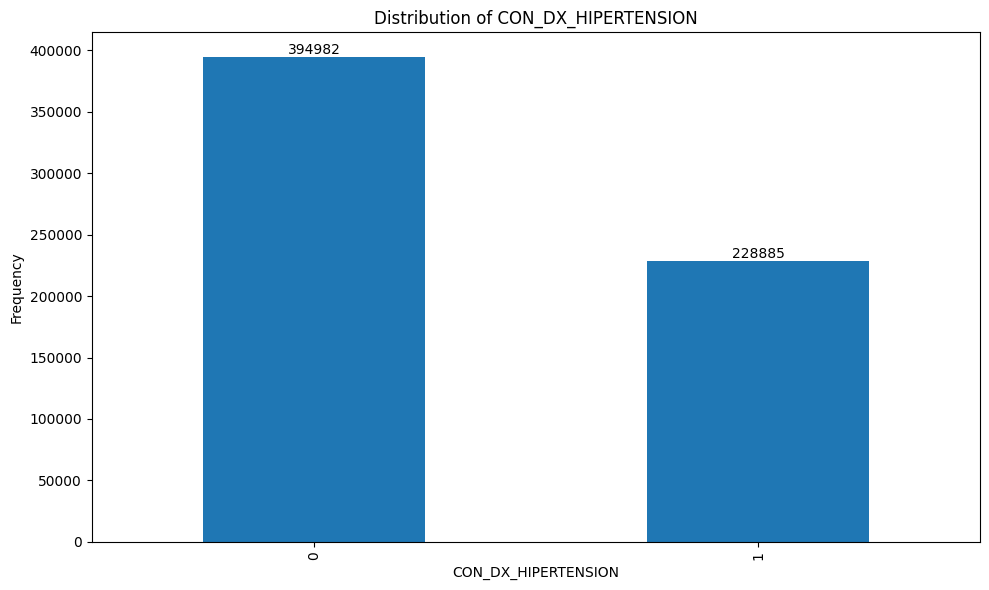

In [ ]:
 plot_numerical_columns_vcount(ds,['CON_DX_HIPERTENSION'])

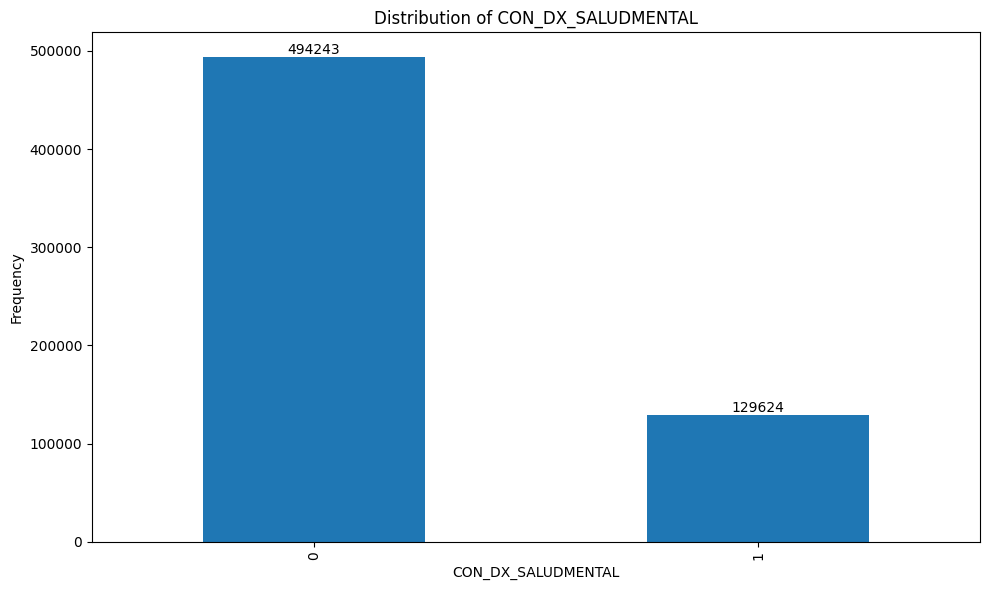

In [ ]:
plot_numerical_columns_vcount(ds,['CON_DX_SALUDMENTAL'])

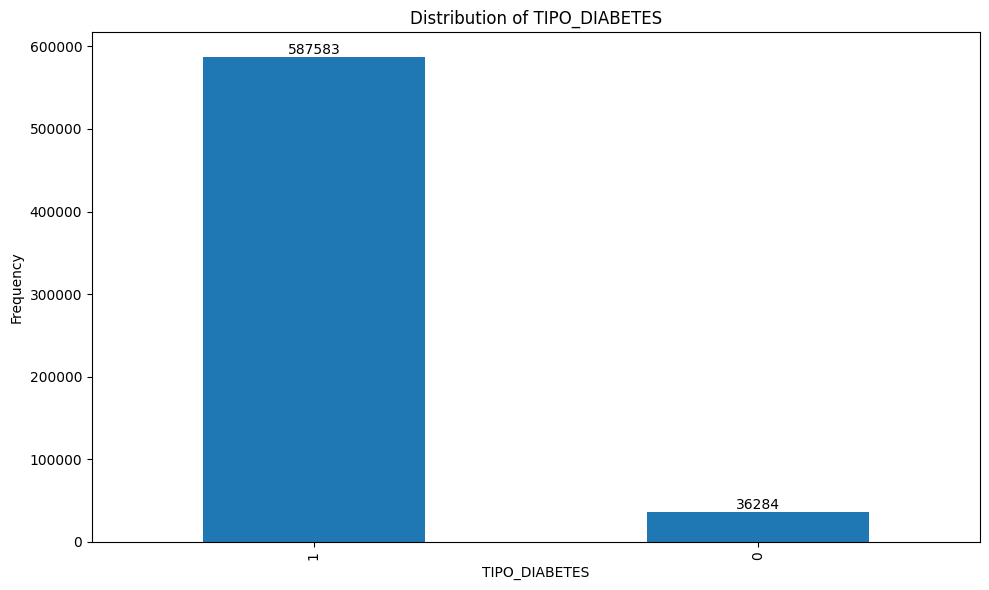

In [105]:
plot_numerical_columns_vcount(ds,['TIPO_DIABETES'])

In [106]:
ds['VALOR_NETO_HOSP'].nunique()

15134

In [107]:
valor_neto_hosp_sin_cero = ds[ds['VALOR_NETO_HOSP'] > 1]

In [108]:
valor_neto_hosp_sin_cero['VALOR_NETO_HOSP'].describe()

,VALOR_NETO_HOSP
count,15454.00
mean,3058.42
std,6758.07
min,1.17
25%,679.06
50%,1370.16
75%,2909.76
max,232695.27


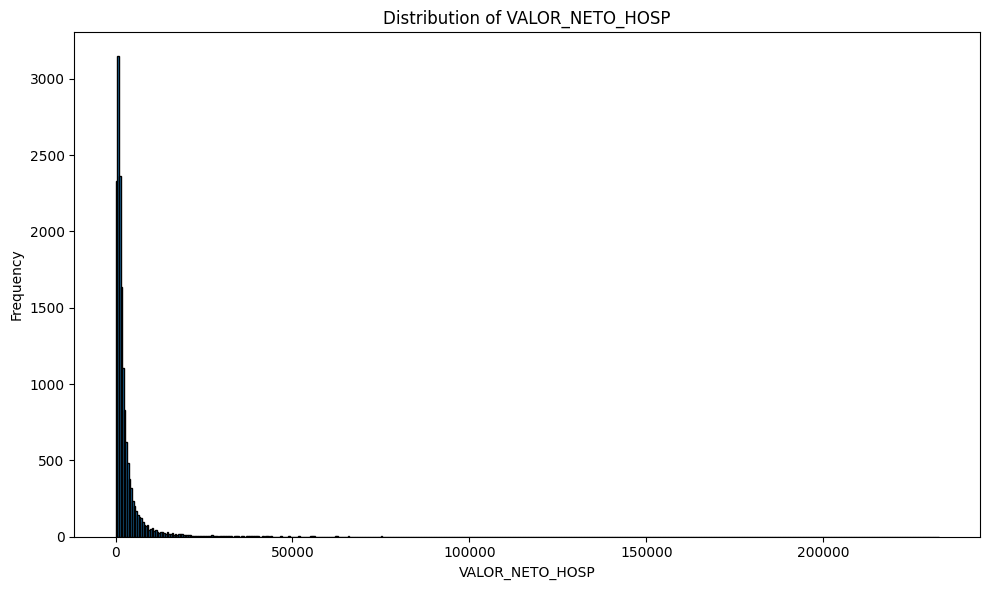

In [109]:
plt.figure(figsize=(10, 6))
plt.hist(valor_neto_hosp_sin_cero['VALOR_NETO_HOSP'], bins=500, edgecolor='black')
plt.xlabel('VALOR_NETO_HOSP')
plt.ylabel('Frequency')
plt.title('Distribution of VALOR_NETO_HOSP')
plt.tight_layout()
plt.show()

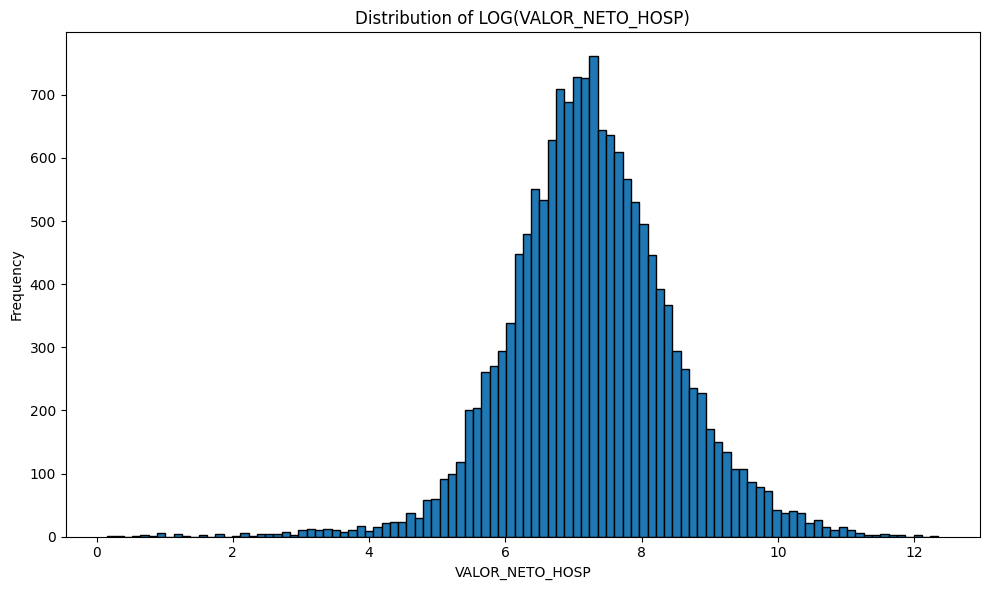

In [110]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(valor_neto_hosp_sin_cero['VALOR_NETO_HOSP']), bins=100, edgecolor='black')
plt.xlabel('VALOR_NETO_HOSP')
plt.ylabel('Frequency')
plt.title('Distribution of LOG(VALOR_NETO_HOSP)')
plt.tight_layout()
plt.show()

In [111]:
ds['VALOR_NETO'].nunique()

40833

In [112]:
valor_neto_sin_cero = ds[ds['VALOR_NETO'] > 1]

In [113]:
valor_neto_sin_cero['VALOR_NETO'].describe()

,VALOR_NETO
count,171941.00
mean,335.13
std,2215.81
min,1.01
25%,5.40
50%,17.64
75%,107.71
max,232695.27


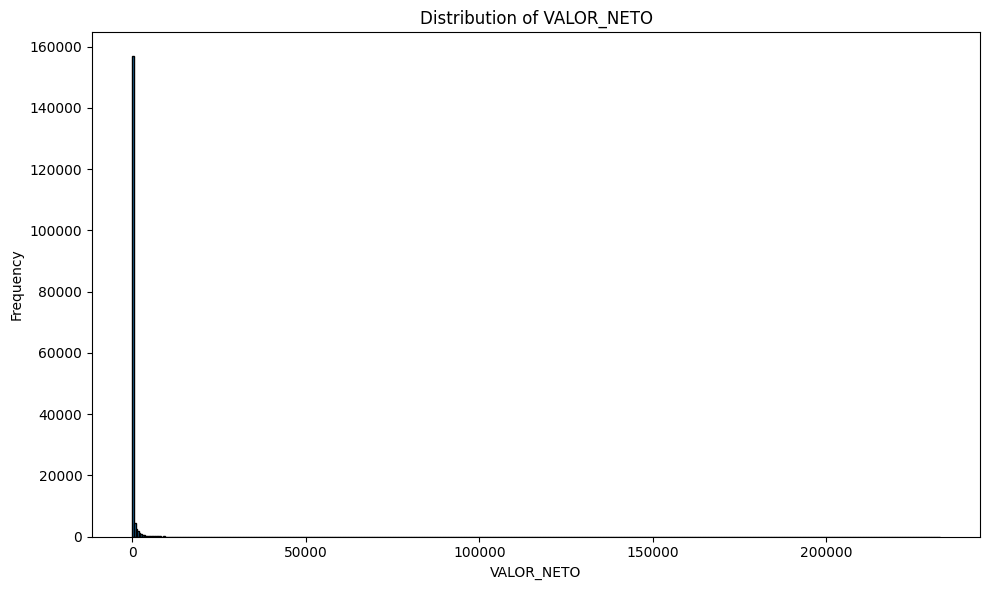

In [114]:
plt.figure(figsize=(10, 6))
plt.hist(valor_neto_sin_cero['VALOR_NETO'], bins=500, edgecolor='black')
plt.xlabel('VALOR_NETO')
plt.ylabel('Frequency')
plt.title('Distribution of VALOR_NETO')
plt.tight_layout()
plt.show()

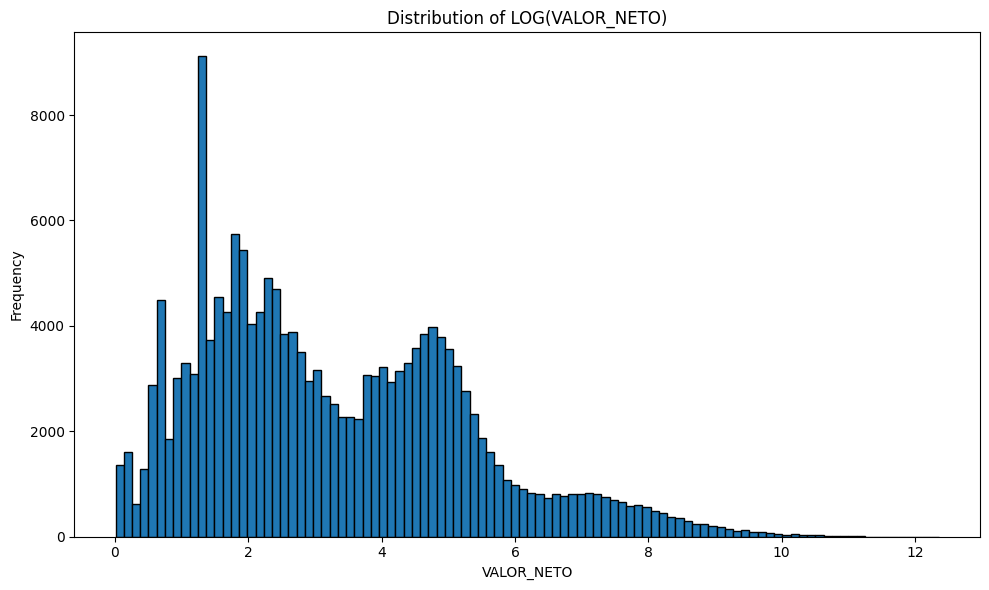

In [115]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(valor_neto_sin_cero['VALOR_NETO']), bins=100, edgecolor='black')
plt.xlabel('VALOR_NETO')
plt.ylabel('Frequency')
plt.title('Distribution of LOG(VALOR_NETO)')
plt.tight_layout()
plt.show()

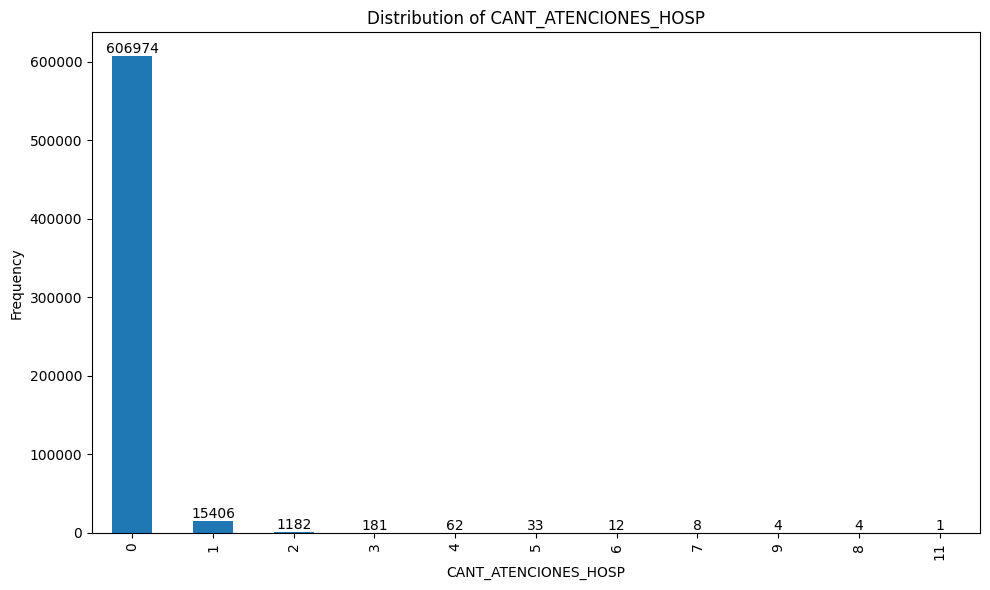

In [116]:
plot_numerical_columns_vcount(ds,['CANT_ATENCIONES_HOSP'])

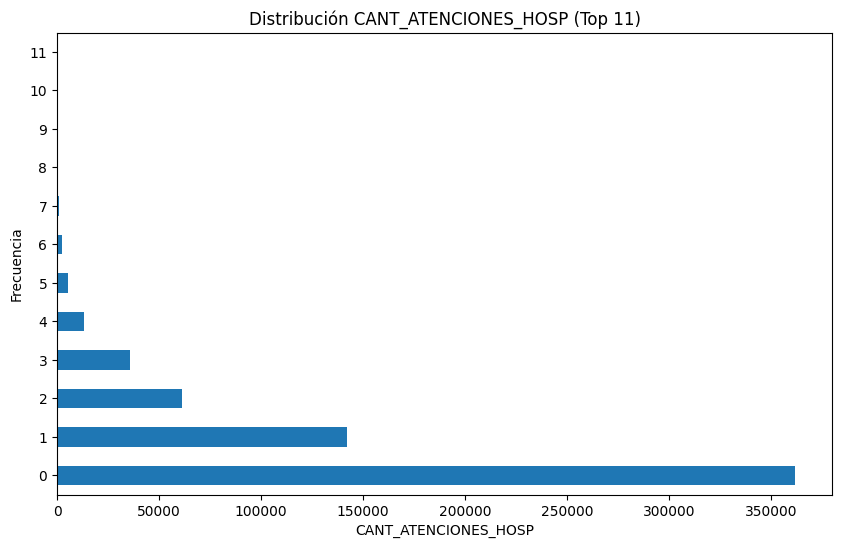

In [117]:
fig, ax = plt.subplots(figsize=(10, 6))
# Calcular value counts y filtrar
value_counts = ds['CANT_ATENCIONES'].value_counts()
filtered_values = value_counts[:12]

# Filtrar el DataFrame original utilizando el índice de valores filtrados
filtered_ds = ds[ds['CANT_ATENCIONES'].isin(filtered_values.index)]

# Graficar el DataFrame filtrado
filtered_ds['CANT_ATENCIONES'].value_counts().plot(kind='barh', ax=ax)
plt.xlabel('CANT_ATENCIONES_HOSP')
plt.ylabel('Frecuencia')
plt.title('Distribución CANT_ATENCIONES_HOSP (Top 11)')
plt.show()

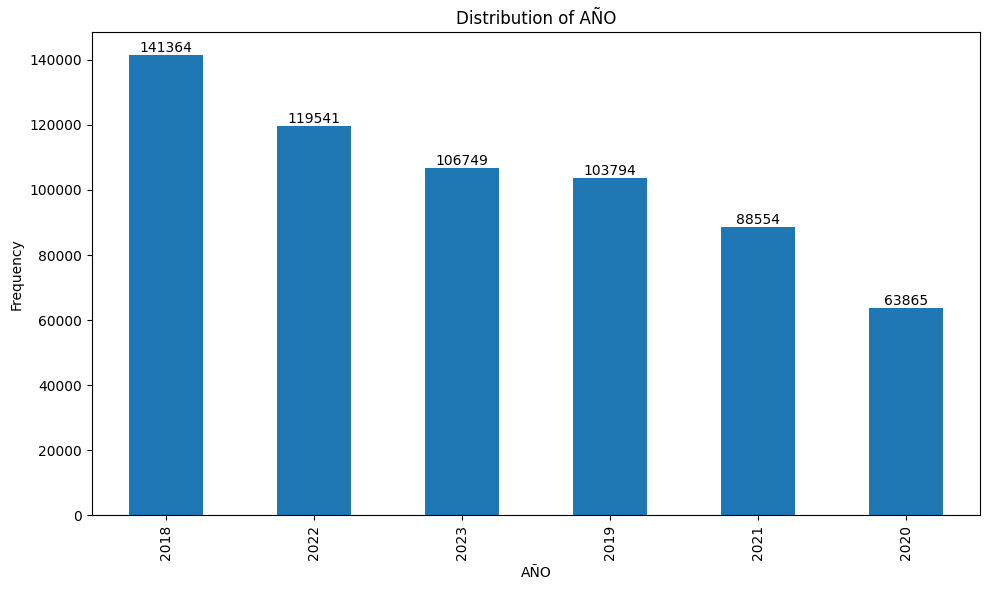

In [118]:
plot_numerical_columns_vcount(ds,['AÑO'])

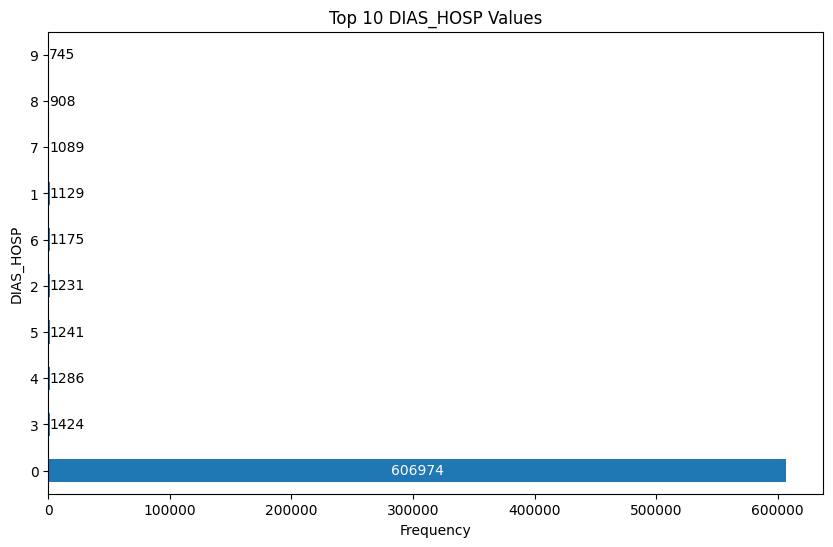

In [119]:
# Calcular value counts y filtrar
cuenta_dias_hosp = ds['DIAS_HOSP'].value_counts()

# Obtener los 10 valores más frecuentes
top_10_values = cuenta_dias_hosp.nlargest(10)  # Use `10` instead of `9` to get top 10

# Filtrar el DataFrame original utilizando el índice de los 10 valores principales
filtered_ds = ds[ds['DIAS_HOSP'].isin(top_10_values.index)]

# Graficar el DataFrame filtrado
fig, ax = plt.subplots(figsize=(10, 6))
bars = filtered_ds['DIAS_HOSP'].value_counts().plot(kind='barh', ax=ax)

# Agregar etiquetas con valores a cada barra
for bar in ax.patches:
    # Obtener el ancho (valor) y la coordenada "y" de la barra
    value = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2

    # Si el valor es mayor a 600.000, colocar la etiqueta dentro de la barra
    if value > 600000:
        ax.text(value / 2, y, f'{int(value)}', ha='center', va='center', color='white')
    else:
        ax.text(value, y, f'{int(value)}', va='center')

plt.xlabel('Frequency')
plt.ylabel('DIAS_HOSP')
plt.title('Top 10 DIAS_HOSP Values')
plt.show()

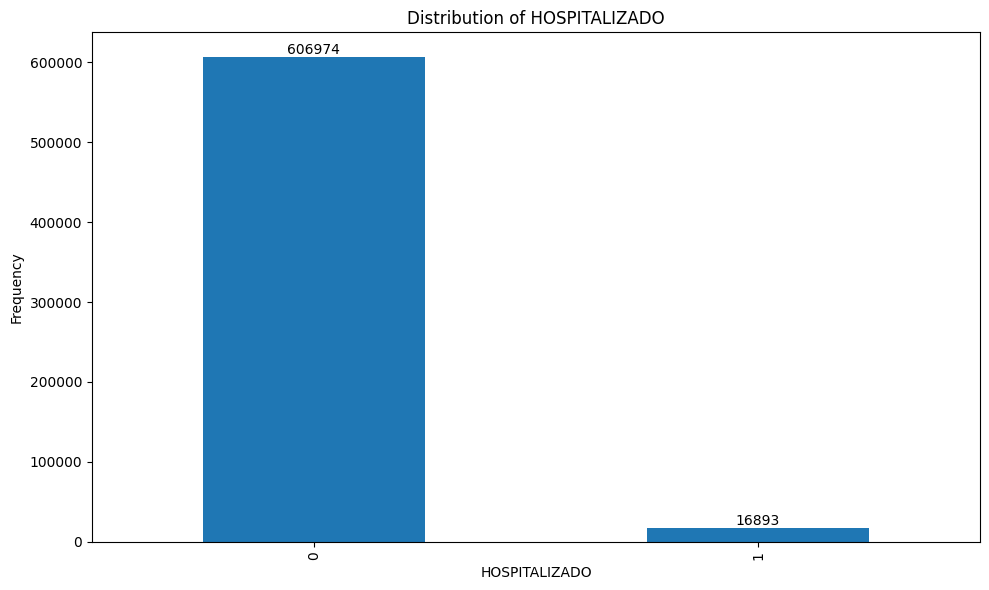

In [120]:
plot_numerical_columns_vcount(ds,['HOSPITALIZADO'])

OBSERVACIONES:

Transformé 'VALOR_NETO_HOSP' Y 'VALOR_NETO' temporalmente para vizualizarlas de una forma parecida a una distribución normal, si se cambia a una nueva columna con log en caso de que no tenga CEROS, sino se usa otra variación de log

'LOG_VALOR_NETO_HOSP', 'LOG_VALOR_NETO', así a la hora de predecir se podrían tener mejores resultados, ya que la mayoría de los modelos asumen que hay una distribución normal

**ANÁLISIS BIVARIADO**

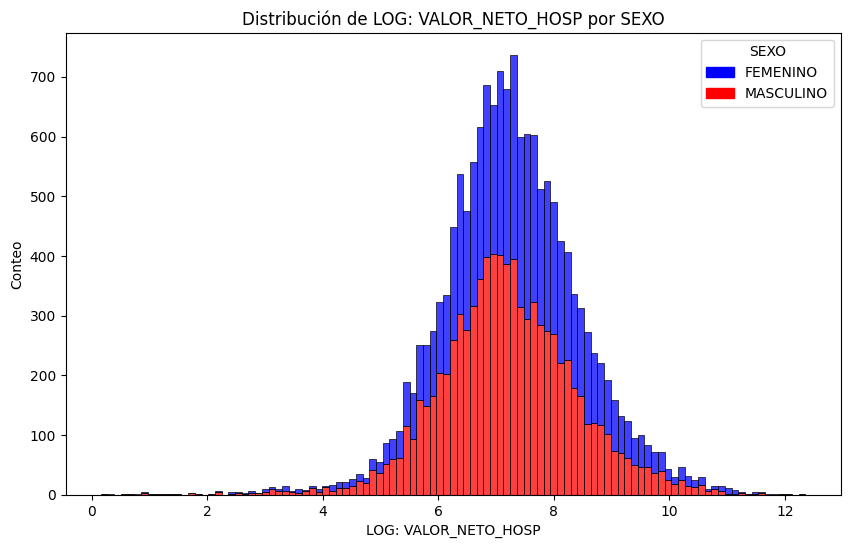

In [122]:
variable = "VALOR_NETO_HOSP"
# Graficar el histograma con tono por género
plt.figure(figsize=(10, 6))
sns.histplot(data=valor_neto_hosp_sin_cero,
             x=np.log(valor_neto_hosp_sin_cero['VALOR_NETO_HOSP']),
             hue='SEXO',
             multiple='stack',
             palette={0: 'blue', 1: 'red'})

# Configurar el título y las etiquetas
plt.title(f'Distribución de LOG: {variable} por SEXO')
plt.xlabel(f"LOG: {variable}")
plt.ylabel('Conteo')

# Crear identificadores de leyenda personalizados
blue_patch = mpatches.Patch(color='blue', label='FEMENINO')
red_patch = mpatches.Patch(color='red', label='MASCULINO')

# Mostrar el gráfico con leyenda personalizada
plt.legend(handles=[blue_patch, red_patch], title='SEXO')
plt.show()

OBSERVACIONES:

Se graficó con la variable sin CEROS "valor_neto_hosp_sin_cero" y aplicada la función LOG para obtener datos entendibles

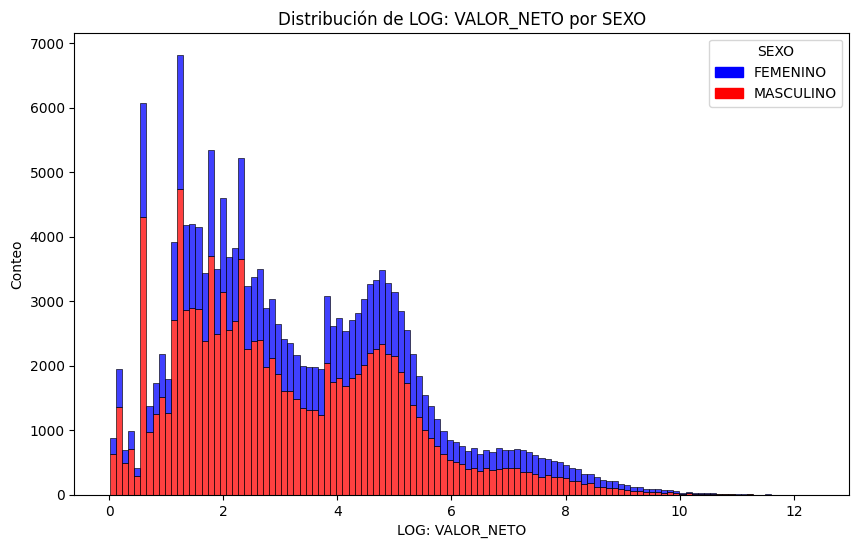

In [126]:
variable = "VALOR_NETO"
# Graficar el histograma con tono por género
plt.figure(figsize=(10, 6))
sns.histplot(data=valor_neto_sin_cero, x=np.log(valor_neto_sin_cero['VALOR_NETO']),
             hue='SEXO',
             multiple='stack',
             palette={0: 'blue', 1: 'red'})

# Configurar el título y las etiquetas
plt.title(f'Distribución de LOG: {variable} por SEXO')
plt.xlabel(f"LOG: {variable}")
plt.ylabel('Conteo')

# Crear identificadores de leyenda personalizados
blue_patch = mpatches.Patch(color='blue', label='FEMENINO')
red_patch = mpatches.Patch(color='red', label='MASCULINO')

# Mostrar el gráfico con leyenda personalizada
plt.legend(handles=[blue_patch, red_patch], title='SEXO')
plt.show()

OBSERVACIONES:

Se graficó con la variable sin CEROS "valor_neto_sin_cero" y aplicada la función LOG para obtener datos entendibles

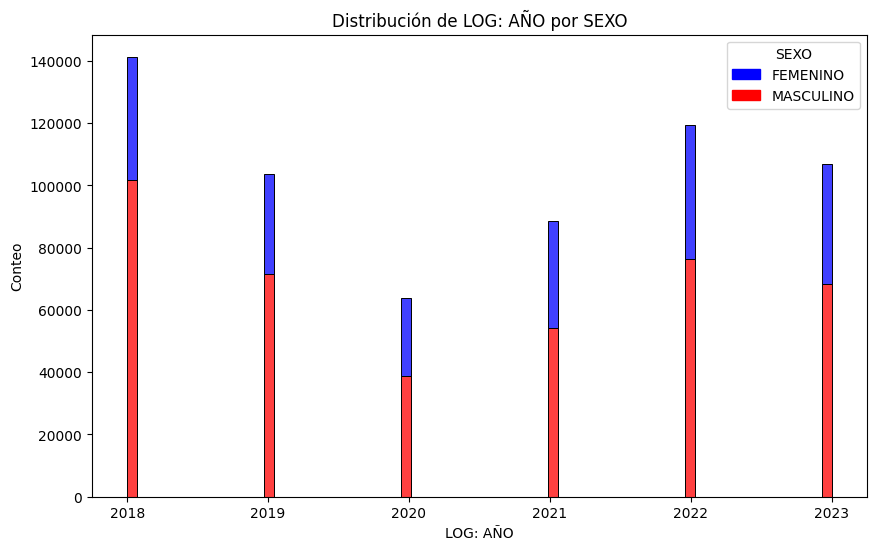

In [124]:
variable = 'AÑO'
# Graficar el histograma con tono por género
plt.figure(figsize=(10, 6))
sns.histplot(data=ds, x='AÑO', hue='SEXO', multiple='stack', palette={0: 'blue', 1: 'red'})

# Configurar el título y las etiquetas
plt.title(f'Distribución de LOG: {variable} por SEXO')
plt.xlabel(f"LOG: {variable}")
plt.ylabel('Conteo')

# Crear identificadores de leyenda personalizados
blue_patch = mpatches.Patch(color='blue', label='FEMENINO')
red_patch = mpatches.Patch(color='red', label='MASCULINO')

# Mostrar el gráfico con leyenda personalizada
plt.legend(handles=[blue_patch, red_patch], title='SEXO')
plt.show()

In [127]:
numerical

Index(['EDAD', 'UBIGEO', 'SEXO', 'TIPO_DIABETES', 'CON_DX_OBESIDAD',
       'CON_DX_HIPERTENSION', 'CON_DX_SALUDMENTAL', 'CANT_ATENCIONES',
       'VALOR_NETO', 'CANT_ATENCIONES_HOSP', 'VALOR_NETO_HOSP', 'DIAS_HOSP',
       'HOSPITALIZADO', 'latitud', 'longitud', 'AÑO', 'ANTIGUEDAD_DX_DIAS'],
      dtype='object')

**HACER UN PAIR PLOT**

In [128]:
# Tomar un subconjunto de las características del Set de Datos
numerical_short = ['VALOR_NETO_HOSP','EDAD','VALOR_NETO','CANT_ATENCIONES_HOSP','HOSPITALIZADO']


In [129]:
# Definir el tamaño de la figura
#plt.figure(figsize=(6, 4))

#columns_to_plot = numerical_short
# Convert the 'Attrition_Flag' column to a string type
#sns.pairplot(ds[columns_to_plot], hue='HOSPITALIZADO',
#             hue_order=[0, 1])
#plt.tight_layout()
# Save the plot to a PNG file
#plt.savefig('pplot2.png', format='png', dpi=300)
#plt.show()

OBSERVACIONES:

Dejé toda esta celda comentada, porque estas líneas de código pueden tomar entre 10 a 20 minutos en ejecutarse

Guardé el resultado y subí la imagen

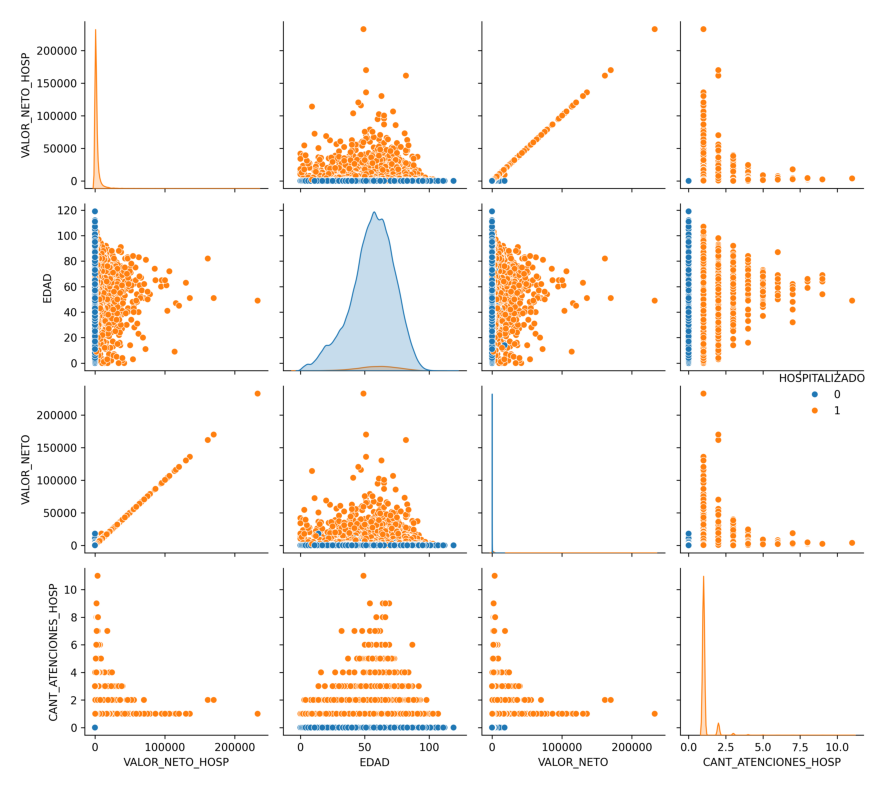

In [130]:
# Cargar la imagen
img = mpimg.imread('pplot2.png')

# Crear una figura con el tamaño especificado
fig, ax = plt.subplots(figsize=(12, 8))

# Mostrar la imagen
ax.imshow(img)
ax.axis('off')  # Esconder ejes

# Ajustar el diseño para garantizar que se respete el tamaño de la figura.
plt.tight_layout()
plt.show()



---





---



CREAR VARIABLES LOG1P VALORES NETO

In [131]:
ds['LOG1P_VALOR_NETO'] = np.log1p(ds['VALOR_NETO'])

In [132]:
ds['LOG1P_VALOR_NETO_HOSP'] = np.log1p(ds['VALOR_NETO_HOSP'])

In [133]:
ds.shape

(623867, 26)

OBSERVACIONES:

Crear esas 2 nuevas columnas ayuda a mejorar el desempeño del modelo, cabe mencionar que a la hora de graficar la distribución de ve obscurecida por la gran cantidad de ceros en las 2 columnas

# FEATURE SELECTION

In [137]:
caracteristicas_importantes = ds.copy()

In [138]:
caracteristicas_importantes = caracteristicas_importantes.drop(columns=['FECHA_AFILIADOS_SIS', 'CODIGO_ANONIMIZADO', 'FECHA_PRIMER_DX'])

In [139]:
caracteristicas_importantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623867 entries, 0 to 623866
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   EDAD                   623867 non-null  int64  
 1   UBIGEO                 623867 non-null  int64  
 2   DEPARTAMENTO           623867 non-null  object 
 3   PROVINCIA              623867 non-null  object 
 4   DISTRITO               623867 non-null  object 
 5   SEXO                   623867 non-null  int64  
 6   TIPO_DIABETES          623867 non-null  int64  
 7   CON_DX_OBESIDAD        623867 non-null  int64  
 8   CON_DX_HIPERTENSION    623867 non-null  int64  
 9   CON_DX_SALUDMENTAL     623867 non-null  int64  
 10  CANT_ATENCIONES        623867 non-null  int64  
 11  VALOR_NETO             623867 non-null  float64
 12  CANT_ATENCIONES_HOSP   623867 non-null  int64  
 13  VALOR_NETO_HOSP        623867 non-null  float64
 14  DIAS_HOSP              623867 non-nu

In [140]:
caracteristicas_importantes['DISTRITO'].nunique()

1708

In [141]:
caracteristicas_importantes['DEPARTAMENTO'].nunique()

25

In [142]:
caracteristicas_importantes['PROVINCIA'].nunique()

196

In [143]:
caracteristicas_importantes['UBICACION'].nunique()

1861

In [144]:
# Inicializar LabelEncoder
label_encoder = LabelEncoder()

# Aplicar label encoding
caracteristicas_importantes['DEPARTAMENTO'] = label_encoder.fit_transform(caracteristicas_importantes['DEPARTAMENTO'])
caracteristicas_importantes['PROVINCIA'] = label_encoder.fit_transform(caracteristicas_importantes['PROVINCIA'])
caracteristicas_importantes['DISTRITO'] = label_encoder.fit_transform(caracteristicas_importantes['DISTRITO'])
caracteristicas_importantes['UBICACION'] = label_encoder.fit_transform(caracteristicas_importantes['UBICACION'])

In [145]:
caracteristicas_importantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623867 entries, 0 to 623866
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   EDAD                   623867 non-null  int64  
 1   UBIGEO                 623867 non-null  int64  
 2   DEPARTAMENTO           623867 non-null  int64  
 3   PROVINCIA              623867 non-null  int64  
 4   DISTRITO               623867 non-null  int64  
 5   SEXO                   623867 non-null  int64  
 6   TIPO_DIABETES          623867 non-null  int64  
 7   CON_DX_OBESIDAD        623867 non-null  int64  
 8   CON_DX_HIPERTENSION    623867 non-null  int64  
 9   CON_DX_SALUDMENTAL     623867 non-null  int64  
 10  CANT_ATENCIONES        623867 non-null  int64  
 11  VALOR_NETO             623867 non-null  float64
 12  CANT_ATENCIONES_HOSP   623867 non-null  int64  
 13  VALOR_NETO_HOSP        623867 non-null  float64
 14  DIAS_HOSP              623867 non-nu

SELECCIÓN DE CARACTERÍSTICAS (COLUMNAS) POR CORRELACIÓN

In [146]:
caracteristicas_importantes.corr()

,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,TIPO_DIABETES,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,HOSPITALIZADO,UBICACION,latitud,longitud,AÑO,ANTIGUEDAD_DX_DIAS,LOG1P_VALOR_NETO,LOG1P_VALOR_NETO_HOSP
EDAD,1.00,-0.04,-0.04,-0.00,0.01,-0.01,0.08,0.11,0.39,0.04,0.10,0.01,0.03,0.01,0.02,0.03,-0.04,-0.01,0.02,-0.14,0.14,0.10,0.03
UBIGEO,-0.04,1.00,1.00,0.37,0.15,-0.01,0.01,-0.03,0.01,-0.03,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,0.98,0.29,-0.11,-0.01,0.01,-0.02,-0.00
DEPARTAMENTO,-0.04,1.00,1.00,0.37,0.15,-0.01,0.01,-0.03,0.01,-0.03,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,0.98,0.29,-0.11,-0.01,0.01,-0.02,-0.00
PROVINCIA,-0.00,0.37,0.37,1.00,0.18,-0.00,0.01,0.01,0.01,-0.02,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.40,0.26,-0.19,-0.00,-0.00,-0.02,-0.00
DISTRITO,0.01,0.15,0.15,0.18,1.00,-0.00,-0.00,-0.01,0.00,-0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.18,0.01,0.02,-0.00,0.00,0.01,0.01
SEXO,-0.01,-0.01,-0.01,-0.00,-0.00,1.00,0.03,0.15,0.03,0.08,0.03,-0.02,-0.03,-0.02,-0.02,-0.03,-0.01,0.02,-0.01,-0.07,0.07,-0.01,-0.04
TIPO_DIABETES,0.08,0.01,0.01,0.01,-0.00,0.03,1.00,0.08,-0.00,-0.01,-0.01,-0.04,-0.05,-0.03,-0.04,-0.05,0.01,0.01,-0.02,0.01,-0.01,-0.05,-0.06
CON_DX_OBESIDAD,0.11,-0.03,-0.03,0.01,-0.01,0.15,0.08,1.00,0.15,0.13,0.14,-0.02,-0.05,-0.03,-0.04,-0.05,-0.03,-0.03,-0.03,-0.15,0.15,0.06,-0.06
CON_DX_HIPERTENSION,0.39,0.01,0.01,0.01,0.00,0.03,-0.00,0.15,1.00,0.13,0.13,0.04,0.06,0.03,0.04,0.06,0.01,0.05,-0.03,-0.11,0.11,0.16,0.07
CON_DX_SALUDMENTAL,0.04,-0.03,-0.03,-0.02,-0.02,0.08,-0.01,0.13,0.13,1.00,0.06,0.02,0.02,0.01,0.02,0.02,-0.02,-0.07,0.01,-0.09,0.09,0.08,0.02


APLICAR TEST DE HIPOTÉSIS A EDAD VS HIPERTENSIÓN

In [147]:
# Calcular el coeficiente de correlación de Pearson y el valor p

"""
Hipótesis nula (H0): No existe correlación entre edad e hipertensión (r = 0)
Hipótesis alternativa (H1): Existe correlación entre edad e hipertensión (r ≠ 0)

Con α = 0.05 (nivel de significancia):

Si p-value < 0.05: Rechazamos H0, lo que significa que hay evidencia estadística de correlación entre edad e hipertensión
"""

correlation_coefficient, p_value = stats.pearsonr(caracteristicas_importantes['EDAD'], caracteristicas_importantes['CON_DX_HIPERTENSION'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.3880929401899096
P-value: 0.0


OBSERVACIONES:

El test de hipotésis realizado indica una correlación estadísticamente significativa entre la edad y la presión arterial alta, lo que sugiere una posible relación.

Sin embargo, es esencial considerar otros factores que pueden influir en esta relación y realizar más análisis para extraer conclusiones más fiables sobre la causalidad. Al investigar los factores de confusión y utilizar modelos estadísticos más complejos, puede obtener conocimientos más profundos sobre la dinámica entre la edad y la presión arterial alta.



---





---



CREAR MAPA DE CALOR DE CORRELACIONES

In [148]:
# Calcular la matriz de correlación y extraer correlaciones con 'HOSPITALIZADO'
corr_matrix = caracteristicas_importantes.corr()
corr_without_target = corr_matrix['HOSPITALIZADO'].drop('HOSPITALIZADO')  # Exclude the target itself

# Ordenar las correlaciones en orden descendente
sorted_corr = corr_without_target.sort_values(ascending=False)

# Seleccionar las 9 características positivas y las 9 negativas más importantes
top_caracteristicas_positivas = sorted_corr.head(9).index.tolist()
top_caracteristicas_negativas = sorted_corr.tail(9).index.tolist()
selected_features2 = top_caracteristicas_positivas + top_caracteristicas_negativas

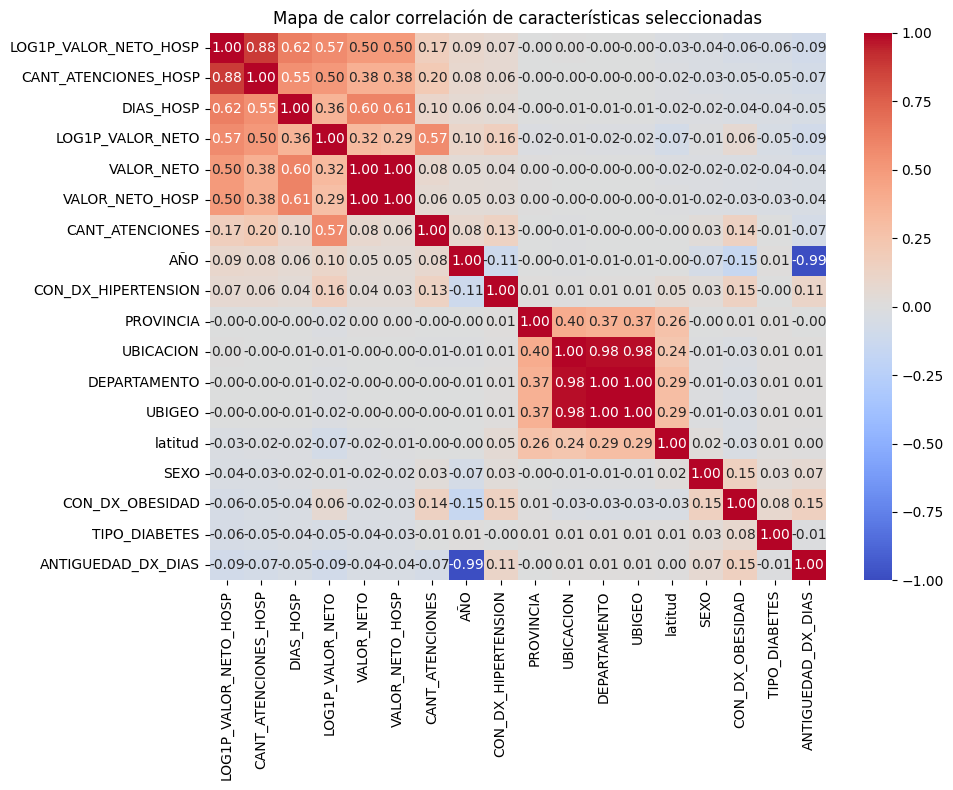

In [149]:
# Crear una nueva matriz de correlación utilizando las características seleccionadas
corr_matrix_selected = caracteristicas_importantes[selected_features2].corr()

# Crer un mapa de calor usando seaborn
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_selected, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor correlación de características seleccionadas')
plt.tight_layout()
plt.show()



---





---



GRAFICAR TOP 6 CORRELACIONES NEGATIVAS Y POSITIVAS

In [150]:
# Calcular la matriz de correlación y extraer correlaciones con 'HOSPITALIZADO'
corr_matrix = caracteristicas_importantes.corr()
corr_without_target = corr_matrix['HOSPITALIZADO'].drop('HOSPITALIZADO')  # Exclude the target itself

# Ordenar las correlaciones en orden descendente
sorted_corr = corr_without_target.sort_values(ascending=False)

# Seleccionar las 6 características positivas y las 6 negativas más importantes
top_positive_features = sorted_corr.head(6).index.tolist()
top_negative_features = sorted_corr.tail(6).index.tolist()
selected_features = top_positive_features + top_negative_features

# Opcional: Mostrar las características seleccionadas
#print("Top Positive Features:", top_positive_features)
#print("Top Negative Features:", top_negative_features)

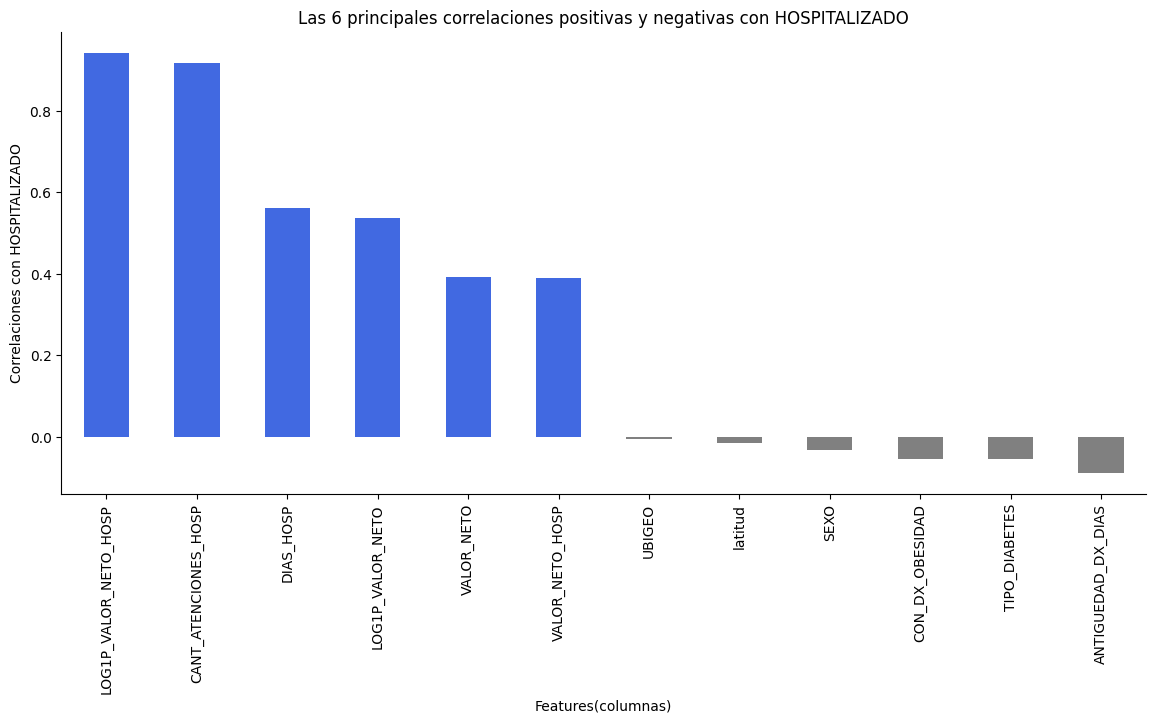

In [151]:
# Crear un mapa de  colores para el gráfico
colors = ['#4169E1'] * len(top_positive_features) + ['gray'] * len(top_negative_features)

# Crear un gráfico de barras para las correlaciones seleccionadas
plt.figure(figsize=(14, 6))
sorted_corr[selected_features].plot.bar(color=colors)

# Agregar etiquetas y título
plt.xlabel('Features(columnas)')
plt.ylabel('Correlaciones con HOSPITALIZADO')
plt.title('Las 6 principales correlaciones positivas y negativas con HOSPITALIZADO')

# Customizar la estética del gráfico
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostrar el gráfico
plt.show()



---





---



BÚSQUEDA DE COLUMNAS IMPORTANTES POR USO DE RFE

RECURSIVE FEATURE ELIMINATION (RFE) WITH LOGISTIC REGRESSION

In [152]:
X = caracteristicas_importantes.drop(columns=['HOSPITALIZADO'])
y = caracteristicas_importantes['HOSPITALIZADO']

In [ ]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['TIPO_DIABETES', 'CON_DX_OBESIDAD', 'CANT_ATENCIONES',
       'CANT_ATENCIONES_HOSP', 'VALOR_NETO_HOSP', 'DIAS_HOSP', 'latitud',
       'longitud', 'LOG1P_VALOR_NETO', 'LOG1P_VALOR_NETO_HOSP'],
      dtype='object')


Se obtuvo esta lista luego de aplicar RFE:


['TIPO_DIABETES', 'CON_DX_OBESIDAD', 'CANT_ATENCIONES',
       'CANT_ATENCIONES_HOSP', 'VALOR_NETO_HOSP', 'DIAS_HOSP', 'latitud',
       'longitud', 'LOG1P_VALOR_NETO', 'LOG1P_VALOR_NETO_HOSP']

Se tiene muchas columnas (relacionadas con atenciones y con valores neto) que pueden exhibir multicolinealidad, una relación directa que puede inflar la varianza de las estimaciones de los coeficientes.

La multicolinealidad puede complicar la interpretación de los resultados de la regresión logística, ya que hace que sea más difícil saber cuál variable está realmente influyendo en la variable dependiente.



---





---



CONFIRMACIÓN/DETECCIÓN DE MULTICOLINEALIDAD

 VARIANCE INFLATION FACTOR (VIF)

In [153]:
X.columns

Index(['EDAD', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'SEXO',
       'TIPO_DIABETES', 'CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION',
       'CON_DX_SALUDMENTAL', 'CANT_ATENCIONES', 'VALOR_NETO',
       'CANT_ATENCIONES_HOSP', 'VALOR_NETO_HOSP', 'DIAS_HOSP', 'UBICACION',
       'latitud', 'longitud', 'AÑO', 'ANTIGUEDAD_DX_DIAS', 'LOG1P_VALOR_NETO',
       'LOG1P_VALOR_NETO_HOSP'],
      dtype='object')

In [154]:
# Define las columnas a mantener
keep_cols = [
    'TIPO_DIABETES', 'CON_DX_OBESIDAD', 'CANT_ATENCIONES',
    'CANT_ATENCIONES_HOSP', 'VALOR_NETO_HOSP', 'DIAS_HOSP', 'latitud',
    'longitud', 'LOG1P_VALOR_NETO', 'LOG1P_VALOR_NETO_HOSP', 'SEXO'
]

# Selecciona las columnas de X para crear X2
X2 = X[keep_cols]

In [155]:
X2.columns

Index(['TIPO_DIABETES', 'CON_DX_OBESIDAD', 'CANT_ATENCIONES',
       'CANT_ATENCIONES_HOSP', 'VALOR_NETO_HOSP', 'DIAS_HOSP', 'latitud',
       'longitud', 'LOG1P_VALOR_NETO', 'LOG1P_VALOR_NETO_HOSP', 'SEXO'],
      dtype='object')

In [156]:
# Añadir un término constante para el Intercepto
X_with_intercept = pd.concat([pd.Series(1, index=X2.index).rename('Intercept'), X2], axis=1)

# Calcular VARIANCE INFLATION FACTOR
vif = pd.DataFrame()
vif["Variable"] = X_with_intercept.columns
# Se usa variance_inflation_factor directamente
vif["VIF"] = [variance_inflation_factor(X_with_intercept.values, i) for i in range(X_with_intercept.shape[1])]

# Se ordenan los valores VIF en orden descendente para una interpretación más fácil
vif = vif.sort_values('VIF', ascending=False)

# Imprimir los resultados VIF
print(vif)

                 Variable     VIF
0               Intercept 1859.52
10  LOG1P_VALOR_NETO_HOSP    6.05
4    CANT_ATENCIONES_HOSP    4.57
9        LOG1P_VALOR_NETO    2.28
6               DIAS_HOSP    2.03
5         VALOR_NETO_HOSP    1.68
3         CANT_ATENCIONES    1.62
7                 latitud    1.61
8                longitud    1.60
2         CON_DX_OBESIDAD    1.06
11                   SEXO    1.03
1           TIPO_DIABETES    1.01


OBSERVACIONES:

LOG1P_VALOR_NETO_HOSP    6.05

CANT_ATENCIONES_HOSP    4.57

LOG1P_VALOR_NETO    2.28

Al incluir esas 3 columnas se ven sus valores excedidos del rango aceptable de nivel de Multicolinealidad, lo que puede dificultar el trabajo del modelo predictivo

Seguir estos criterios es bueno, si se piensa usar Logistic Regression